<a href="https://colab.research.google.com/github/angeles-vinicius/Python-Immersion/blob/main/PythonImmersion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451237,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [7]:
dados.columns = ['abertura', 'maximo', 'minimo', 'fechamento', 'fech_ajust', 'volume']
dados

,abertura,maximo,minimo,fechamento,fech_ajust,volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451237,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [9]:
dados = dados.rename_axis('data')
dados

,abertura,maximo,minimo,fechamento,fech_ajust,volume
data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451237,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


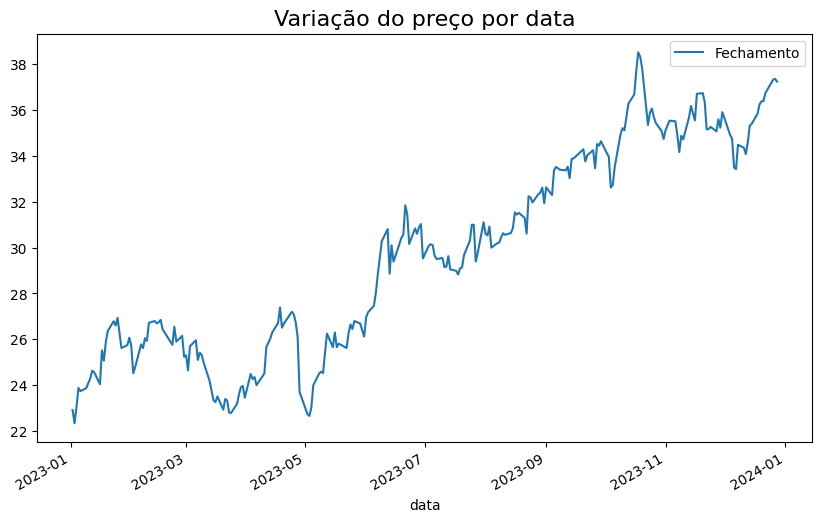

In [12]:
dados['fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

In [16]:
df = dados.head(60).copy()
# Convertendo o indice em uma coluna de data
df['data'] = df.index
# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para o matplotlib possa plotar as datas corretamente no gráfico
df['data'] = df['data'].apply(mdates.date2num)

df

,abertura,maximo,minimo,fechamento,fech_ajust,volume,data
data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451237,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443510,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613495,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030735,58130000,19369.0


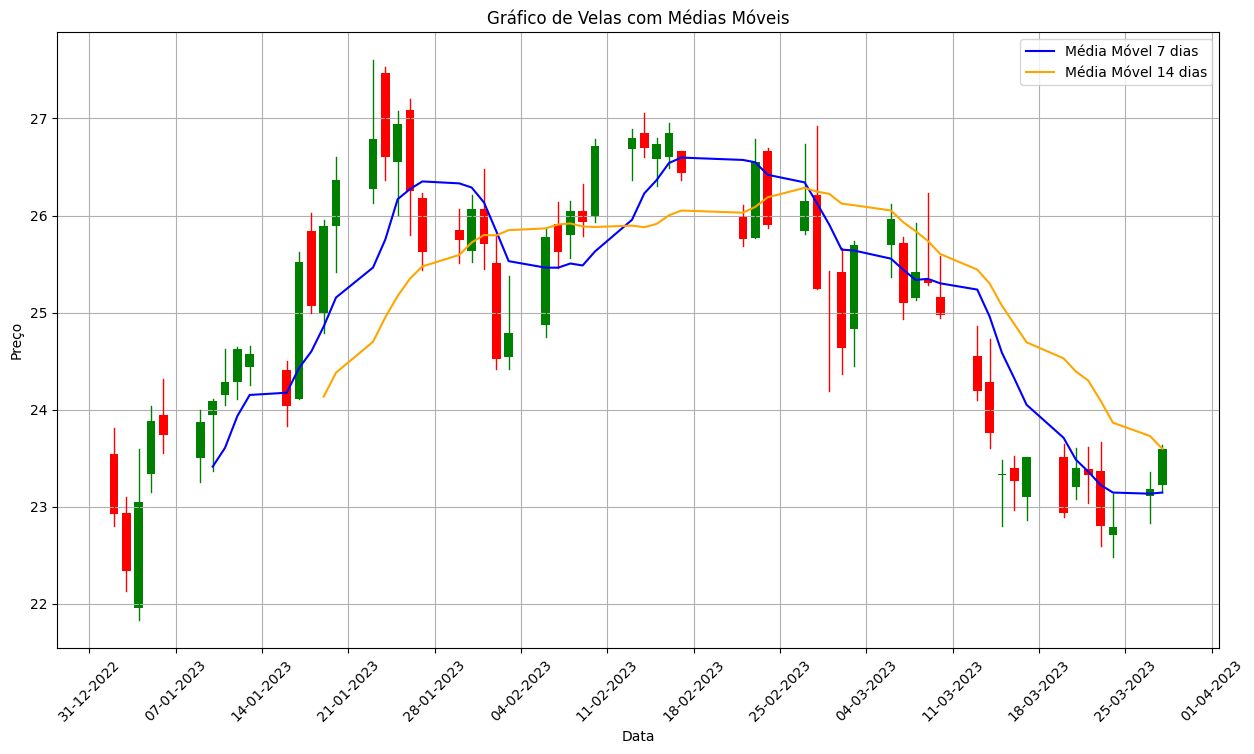

In [25]:
# Criar uma figura e um conjunto de eixos
fig, ax = plt.subplots(figsize=(15, 8))

# Definir a largura da vela no gráfico
width = 0.7

# Iterar sobre o DataFrame
for i in range(len(df)):
    # Verificar se o preço de fechamento é maior que o preço de abertura
    # O candle é verde (a ação valorizou nesse dia)
    # Se for menor, o candle é vermelho (a ação desvalorizou)
    if df["fechamento"].iloc[i] > df['abertura'].iloc[i]:
        color = 'green'  # Definir cor verde para vela de alta
    else:
        color = 'red'  # Definir cor vermelha para vela de baixa

    # Desenhar uma linha vertical representando a vela
    ax.plot([df['data'].iloc[i], df['data'].iloc[i]],  # X - coordenadas (mesma data)
            [df['minimo'].iloc[i], df['maximo'].iloc[i]],  # Y - coordenadas (mínimo e máximo)
            color=color,  # Cor da linha
            linewidth=1)  # Largura da linha

    # Adicionar um retângulo representando o corpo da vela
    ax.add_patch(plt.Rectangle((df['data'].iloc[i] - width/2, min(df['abertura'].iloc[i], df["fechamento"].iloc[i])),  # Coordenadas do canto inferior esquerdo
                               width,  # Largura do retângulo
                               abs(df["fechamento"].iloc[i] - df["abertura"].iloc[i]),  # Altura do retângulo (diferença entre os preços de abertura e fechamento)
                               facecolor=color))  # Cor do retângulo

  # Calcular médias móveis de 7 dias e 14 dias
df['MA7'] = df['fechamento'].rolling(window=7).mean()
df['MA14'] = df['fechamento'].rolling(window=14).mean()

# Plotar médias móveis
ax.plot(df['data'], df['MA7'], label='Média Móvel 7 dias', color='blue') # Média de 7 dias
ax.plot(df['data'], df['MA14'], label='Média Móvel 14 dias', color='orange') # Média de 14 dias

# Adicionar legenda
ax.legend()

# Formatar eixo x para datas
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Definir intervalo para mostrar uma data a cada 7 dias
plt.xticks(rotation=45)  # Rotacionar datas para melhor legibilidade


# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Velas com Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço')

# Adicionar grade
plt.grid(True)

# Exibir o gráfico
plt.show()



In [27]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['abertura'],
                             high=df['maximo'],
                             low=df['minimo'],
                             close=df['fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['volume'],
                     name='volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [28]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


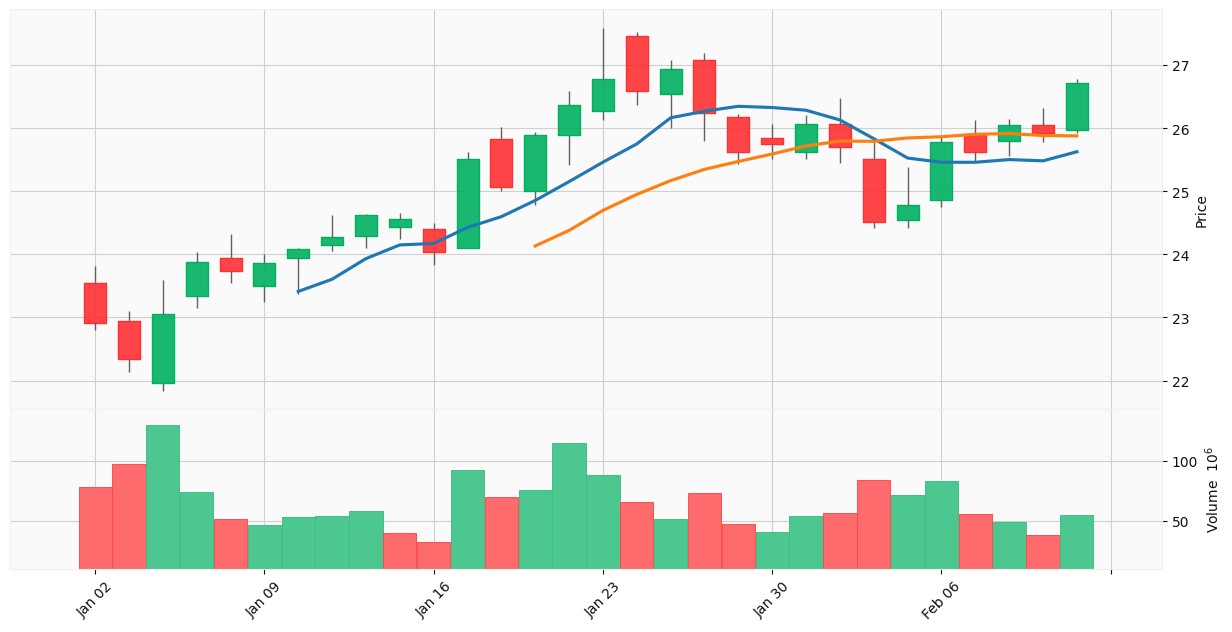

In [29]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')